## Super Nintendo Games Dataset
- Scrapping the list table with MechanicalSoup from wikipedia page

In [4]:
import mechanicalsoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#creating the browser object
browser = mechanicalsoup.StatefulBrowser()

#specifying the html
browser.open('https://en.wikipedia.org/wiki/List_of_Super_Nintendo_Entertainment_System_games')

<Response [200]>

In [ ]:
#extract table data

td = browser.page.find_all('td')
columns = [value.text.replace('\n', '') for value in td]
columns = columns[:12297]

print(columns)
#as we get all table data for all tables, I'll slice off until the index which match 'Donkey Kong Country: Blockbuster World Video Game Championship II'

In [132]:
# if prints this command to see all elements in the last column (ref), it seems some values in the first column are here
# columns[6:][::7]
print(columns.index('Fever Pitch Soccer•Head-On SoccerNA'))

2631


In [133]:
# we see that from 'Feda: The Emblem of Justice' to 'Fever Pitch Soccer•Head-On SoccerNA' there are only 6 values.
# In the wikipedia page it is missing a value there, so our table looks weird.
# I will insert ref '' for this row.
columns[2625:2632]

['Feda: The Emblem of Justice',
 'Max Entertainment',
 'Yanoman',
 'October 28, 1994',
 'Unreleased',
 'Unreleased',
 'Fever Pitch Soccer•Head-On SoccerNA']

In [134]:
columns.insert(2631, '')

In [136]:
#Here is the same problem.
print(columns.index('Mr. Do!'))
columns.insert(6222, '')

6222


In [137]:
print(columns.index('Mr. Do!'))

6223


In [ ]:
# Selecting every column, 7 columns total

#Selecting every 7th item, starting with the first one, which are all items for the first column
print(columns[0:][::7])
# print(columns[1:][::7]) , every second item, for the second colum and so on.

In [145]:
column_names = ['Title', 'Developer(s)', 'Publisher(s)', 'Japan', 'North_America', 'PAL_region', 'Ref.']
info_games_dict = {}

for idx, key in enumerate(column_names):
    info_games_dict[key] = columns[idx:][::7]

### Save/reload the data

In [156]:
import json

def save_data(title, data):
    with open(title, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=3)df.info()

In [162]:
save_data('snes_data.json', info_games_dict)

In [6]:
import json

def load_data(title):
    with open(title, encoding='utf-8') as f:
        return json.load(f)

In [7]:
info_games_dict = load_data('snes_data.json')

In [8]:
df = pd.DataFrame(data=info_games_dict)
df.head()

,Title,Developer(s),Publisher(s),Japan,North_America,PAL_region,Ref.
0,3 Ninjas Kick Back,Malibu Interactive,Sony Imagesoft,Unreleased,"June 19, 1994",Unreleased,
1,3×3 Eyes Juuma Houkan,System Supply N-Tech,Banpresto,"December 22, 1995",Unreleased,Unreleased,
2,3×3 Eyes Seima Kourin-den,Nova Games,Yutaka,"July 28, 1992",Unreleased,Unreleased,
3,3rd Super Robot Wars,Banpresto,Banpresto,"July 23, 1993",Unreleased,Unreleased,
4,4 Nin Shougi,Planning Office Wada,Planning Office Wada,"July 14, 1995",Unreleased,Unreleased,


In [9]:
# Creating the images folder for saving the graphs later

image_path = './images/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1757 non-null   object
 1   Developer(s)   1757 non-null   object
 2   Publisher(s)   1757 non-null   object
 3   Japan          1757 non-null   object
 4   North_America  1757 non-null   object
 5   PAL_region     1757 non-null   object
 6   Ref.           1757 non-null   object
dtypes: object(7)
memory usage: 96.2+ KB


In [11]:
df.shape

(1757, 7)

### The dataset contains a list of 1757 official releases games of SNES.

In [12]:
#Converting column objects to datatime

df['Realese_JP'] = pd.to_datetime(df['Japan'], errors='coerce')
df['Realese_North_America'] = pd.to_datetime(df['North_America'], errors='coerce')
df['Realese_PAL_region'] = pd.to_datetime(df['PAL_region'], errors='coerce')

In [13]:
#getting the year and month for each region

#Japan
df['Year_JP'] = df['Realese_JP'].dt.year
df['Year_JP'] = df['Year_JP'].astype('Int64') # as there are NaN, it returns floats, so I converted it to int 64

df['Month_JP'] = df['Realese_JP'].dt.month
df['Month_JP'] = df['Month_JP'].astype('Int64')

#North America
df['Year_North_America'] = df['Realese_North_America'].dt.year
df['Year_North_America'] = df['Year_North_America'].astype('Int64')

df['Month_North_America'] = df['Realese_North_America'].dt.month
df['Month_North_America'] = df['Month_North_America'].astype('Int64')

#PAL
df['Year_PAL'] = df['Realese_PAL_region'].dt.year
df['Year_PAL'] = df['Year_PAL'].astype('Int64')

df['Month_PAL'] = df['Realese_PAL_region'].dt.month
df['Month_PAL'] = df['Month_PAL'].astype('Int64')

In [14]:
#Grouping the data by year and month for each region

df_analysis_JP = df.groupby(['Year_JP', 'Month_JP']).count()
df_analysis_NA = df.groupby(['Year_North_America', 'Month_North_America']).count()
df_analysis_PAL = df.groupby(['Year_PAL', 'Month_PAL']).count()

#### Monthly plot of the number of releses per year

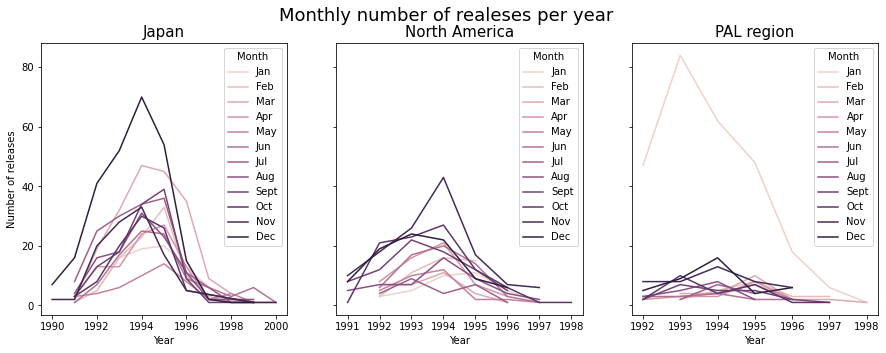

In [15]:
fig, axes = plt.subplots(1,3 , figsize=(15, 5), sharey=True)
fig.suptitle('Monthly number of realeses per year', fontsize=18)

#defining the months to put in the legend.
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

#Japan
sns.lineplot(ax=axes[0], data=df_analysis_JP, x="Year_JP", y="Title", hue="Month_JP", legend="full")
axes[0].set_title('Japan', fontsize=15)
axes[0].set(xlabel='Year', ylabel = 'Number of releases')
axes[0].legend(labels=months, title = "Month")

#North America
sns.lineplot(ax=axes[1], data=df_analysis_NA, x="Year_North_America", y="Title", hue="Month_North_America", legend="full")
axes[1].set_title('North America', fontsize=15)
axes[1].set(xlabel='Year', ylabel = 'Number of releases')
axes[1].legend(labels=months, title = "Month")

#PAL region
sns.lineplot(ax=axes[2], data=df_analysis_PAL, x="Year_PAL", y="Title", hue="Month_PAL", legend="full")
axes[2].set_title('PAL region', fontsize=15)
axes[2].set(xlabel='Year', ylabel = 'Number of releases')
axes[2].legend(labels=months, title = "Month")

plt.show()

fig.savefig(image_path + 'Monthly_number_realeses_year.png')

#### Some points to consider in this graph:

- The first game released in Japan was in November 1990 and the last one was in November 2000.
- Japan released more games.
- The peak of releasing was in 1994 for both Japan and North America.
- The PAL region is not precise, because the data only contain the year, so when converting the data for month, they become the first month (January). Therefore, the PAL region graph shows peaks of releasing in every years of January.

#### Ploting the distribution of releasing from Japan

In [16]:
#taking the rows where 'Year_JP' column is not NaN

df_japan = df[df['Year_JP'].notna()]

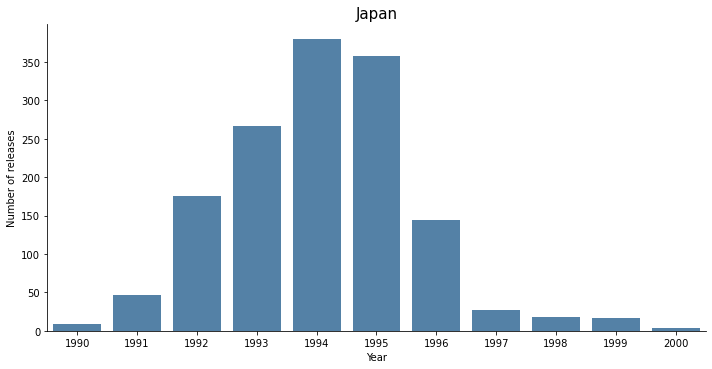

In [17]:
fig = sns.catplot(x='Year_JP', data=df_japan, aspect=2, kind="count", color='steelblue')
plt.xlabel('Year')
plt.ylabel('Number of releases')
plt.title("Japan", fontsize=15)



fig.savefig(image_path + 'japan_number_realeses_year.png', dpi=300)
plt.show()

#### Analysing the game developers

In [18]:
df.head()

,Title,Developer(s),Publisher(s),Japan,North_America,PAL_region,Ref.,Realese_JP,Realese_North_America,Realese_PAL_region,Year_JP,Month_JP,Year_North_America,Month_North_America,Year_PAL,Month_PAL
0,3 Ninjas Kick Back,Malibu Interactive,Sony Imagesoft,Unreleased,"June 19, 1994",Unreleased,,NaT,1994-06-19,NaT,<NA>,<NA>,1994,6,<NA>,<NA>
1,3×3 Eyes Juuma Houkan,System Supply N-Tech,Banpresto,"December 22, 1995",Unreleased,Unreleased,,1995-12-22,NaT,NaT,1995,12,<NA>,<NA>,<NA>,<NA>
2,3×3 Eyes Seima Kourin-den,Nova Games,Yutaka,"July 28, 1992",Unreleased,Unreleased,,1992-07-28,NaT,NaT,1992,7,<NA>,<NA>,<NA>,<NA>
3,3rd Super Robot Wars,Banpresto,Banpresto,"July 23, 1993",Unreleased,Unreleased,,1993-07-23,NaT,NaT,1993,7,<NA>,<NA>,<NA>,<NA>
4,4 Nin Shougi,Planning Office Wada,Planning Office Wada,"July 14, 1995",Unreleased,Unreleased,,1995-07-14,NaT,NaT,1995,7,<NA>,<NA>,<NA>,<NA>


In [ ]:
df['Developer(s)'].unique()

In [20]:
#Some cells in developers has empty values but they are not NaN, so I will replace " " for NaN

df_dev = df.replace(r'^\s*$', np.nan, regex=True)

df_dev= df_dev[df_dev['Developer(s)'].notna()] #droping NaN
df_dev = df_dev.groupby('Developer(s)').count() #counting the devs

df_dev = df_dev.sort_values('Title', ascending=False)
df_dev = df_dev.head(20) #getting only the 20 first developers, which more developed games.

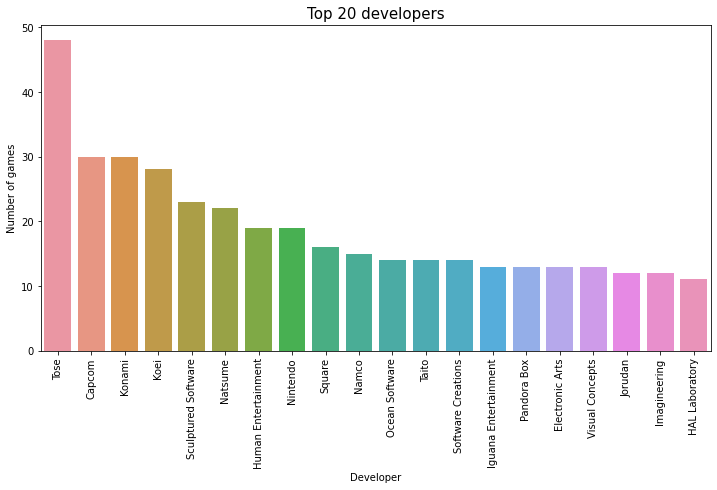

In [21]:
fig = plt.figure(figsize=(12, 6))

sns.barplot(data=df_dev, x=df_dev.index, y="Title")
plt.xticks(rotation = 'vertical')

plt.xlabel('Developer')
plt.ylabel('Number of games')
plt.title("Top 20 developers", fontsize=15)

plt.show()

fig.savefig(image_path + 'top_developers.png', dpi = 300, bbox_inches="tight")

#### Incredibly Nintendo itself is not the most developer of snes games.

#### Plotting the history of releasing games in Japan for the 1990 year.

In [22]:
df.head()

,Title,Developer(s),Publisher(s),Japan,North_America,PAL_region,Ref.,Realese_JP,Realese_North_America,Realese_PAL_region,Year_JP,Month_JP,Year_North_America,Month_North_America,Year_PAL,Month_PAL
0,3 Ninjas Kick Back,Malibu Interactive,Sony Imagesoft,Unreleased,"June 19, 1994",Unreleased,,NaT,1994-06-19,NaT,<NA>,<NA>,1994,6,<NA>,<NA>
1,3×3 Eyes Juuma Houkan,System Supply N-Tech,Banpresto,"December 22, 1995",Unreleased,Unreleased,,1995-12-22,NaT,NaT,1995,12,<NA>,<NA>,<NA>,<NA>
2,3×3 Eyes Seima Kourin-den,Nova Games,Yutaka,"July 28, 1992",Unreleased,Unreleased,,1992-07-28,NaT,NaT,1992,7,<NA>,<NA>,<NA>,<NA>
3,3rd Super Robot Wars,Banpresto,Banpresto,"July 23, 1993",Unreleased,Unreleased,,1993-07-23,NaT,NaT,1993,7,<NA>,<NA>,<NA>,<NA>
4,4 Nin Shougi,Planning Office Wada,Planning Office Wada,"July 14, 1995",Unreleased,Unreleased,,1995-07-14,NaT,NaT,1995,7,<NA>,<NA>,<NA>,<NA>


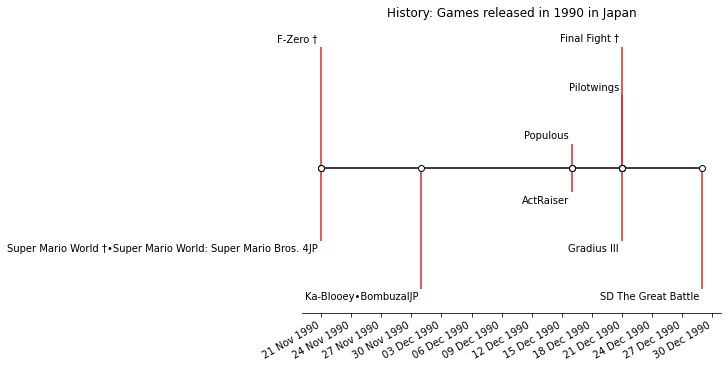

In [23]:
df_release_JP = df[df['Realese_JP'].notna()]
df_release_JP_1990 = df_release_JP.loc[df_release_JP['Year_JP'] == 1990]
df_release_JP_1990 = df_release_JP_1990.sort_values('Realese_JP', ascending=False)
dates = df_release_JP_1990['Realese_JP']
names = df_release_JP_1990['Title']

import matplotlib.dates as mdates

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.set(title="History: Games released in 1990 in Japan")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 3 days intervals
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

fig.savefig(image_path + 'history_japan_1990.png')

#### The classics Super Mario World and F-zero were the first games released in Super Nintendo.

In [123]:
#Saving this data which we scrapped from wikipedia.

df.to_csv('./snes_data.csv')